In [43]:
import mysql.connector
import pandas as pd
conn = mysql.connector.connect(host='localhost',
                                       database='feeManagement',
                                       user='root',
                                       password='Geeky@Zain98')
cursor=conn.cursor(buffered=True)

In [44]:
cursor.execute('Describe fee')
records=cursor.fetchall()
for x in records:
    print(x)

('id', b'int', 'NO', 'PRI', None, 'auto_increment')
('total_fee', b'int', 'NO', '', None, '')
('sub_fee', b'int', 'NO', '', None, '')
('rem_fee', b'int', 'NO', '', None, '')
('roll_no', b'varchar(20)', 'NO', '', None, '')
('class', b'varchar(20)', 'YES', '', None, '')


In [45]:
data=[]
cursor.execute('select * from fee')
records=cursor.fetchall()
for x in records:
    data.append(x)

In [46]:
df=pd.DataFrame(data)
df.columns=['id','totalFee','subfee','dues','rollno','class']
df.head(5)

,id,totalFee,subfee,dues,rollno,class
0,2,131000,70000,61000,1-2,first
1,3,131000,50000,81000,1-3,first
2,4,131000,120000,11000,1-4,first
3,6,131000,17000,114000,1-5,first
4,7,131000,75000,56000,1-6,first


In [69]:
# converting string rollno to float
rno=[]
for x in df['rollno']:
    x=x.replace("-","")
    fvalue=float(x)
    if(fvalue>200):
        fvalue=fvalue/10
    rno.append(fvalue)
print('rollno after scaling\n',rno)
rdf=pd.DataFrame(rno)
rdf.columns=['rollno']
rdf.head(3)

rollno after scaling
 [12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 38.0, 39.0, 31.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 41.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 51.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 61.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 71.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 81.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 91.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 101.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 111.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 121.0, 121.2, 31.3, 121.5, 111.2, 114.0]


,rollno
0,12.0
1,13.0
2,14.0


In [70]:
import warnings
warnings.filterwarnings('ignore')
dfn['dues']=df['dues']
dfn['rollno']=rdf['rollno']
dfn

,dues,rollno
0,61000,12.0
1,81000,13.0
2,11000,14.0
3,114000,15.0
4,56000,16.0
...,...,...
116,11250,121.2
117,113440,31.3
118,115000,121.5
119,124168,111.2


## K-Means clustering on Dues amount and Rollno

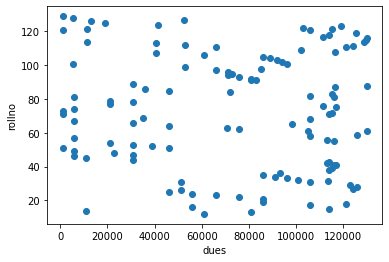

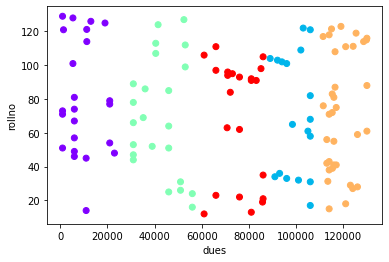

In [71]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
# Visualize the data
plt.scatter(dfn['dues'], dfn['rollno'])
plt.xlabel('dues')
plt.ylabel('rollno')
plt.show()

# Perform k-means clustering with k=3
kmeans = KMeans(n_clusters=5)
kmeans.fit(dfn)

# Visualize the clusters
plt.scatter(dfn['dues'], dfn['rollno'], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('dues')
plt.ylabel('rollno')
plt.show()